# Diabetes Prediction -  Decision Tree

In this work, we design a prediction model, that predicts whether a patient has diabetes, based on certain diagnostic measurements included in the dataset,     
and explore various techniques to boost performance and accuracy.

In [49]:
import warnings
warnings.filterwarnings("ignore")

In [50]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, classification_report

In [52]:
# reading dataset
df = pd.read_csv(r"C:\Users\fatim\Downloads\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# EDA and Data Preprocessing¶
EDA is the process of investingating the dataset to discover hidden patterns, anomalies(outliers), relationship and form hypotheses based on our understanding of the dataset.

In [53]:
# find the shape of datset
dataset_X = df.iloc[:,[0 , 1, 2, 3, 4 ,5, 6 , 7, 8]]
dataset_X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [54]:
# getting information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [55]:
# getting statical information about our dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Missing Values

In [56]:
# checking for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [57]:
# checking dublicate rows in dataset
df.duplicated().sum()

0

# Univeriant Analysis
Analysing each variables seperatly

In [58]:
# First of all analysing target feature i.e Outcome
# find the unique values count in our target feature
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

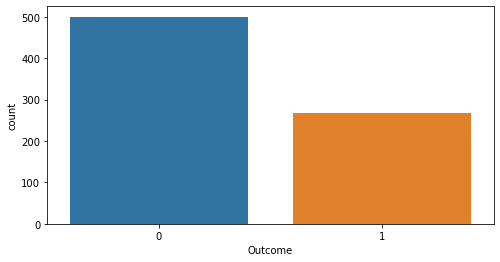

In [59]:
# plot a counter plot to better understand our target feature
plt.figure(figsize=(8,4))
sns.countplot(x = 'Outcome',data = df)
plt.show()

**Inference:**
* Our target varaible have only two class. 0 and 1. Here 0 and 1 represend not having diabetes and having diabetes respectilvey.
* We can see that we have inblacne dataset.
* We have to keep same ratio while we spliting our dataset into training and testing set.

# Feture Engineering
Feature engineering is the process of selecting, transforming, and creating new featuresfrom raw data to improve the performance of machine learning models.    
The goal of feature engineering is to extract the most useful information from the data and create a representation that is suitable for the specific problem being solved.

**Feture like Glucose, BloodPressure, SkinThickness, Insulin, BMI contains values as 0 which is not correct.   
So we change 0 with NaN and then replace nan value form our datasets.**

In [60]:
# Replacing zero values with NaN
dataset = df
dataset[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]] = dataset[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]].replace(0, np.NaN)

In [61]:
# Count of NaN
dataset.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [62]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


KNNimputer is a scikit-learn class used to fill out or predict the missing values in a dataset. It is a more useful method which works on the basic approach of the KNN algorithm rather than the naive approach of filling all the values with mean or the median. In this approach, we specify a distance from the missing values which is also known as the K parameter. The missing value will be predicted in reference to the mean of the neighbours.

In [63]:
train_knn = dataset.copy(deep=True)
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
train_knn["Glucose"] = knn_imputer.fit_transform(train_knn[["Glucose"]])
train_knn["BloodPressure"] = knn_imputer.fit_transform(train_knn[["BloodPressure"]])
train_knn["SkinThickness"] = knn_imputer.fit_transform(train_knn[["SkinThickness"]])
train_knn["Insulin"] = knn_imputer.fit_transform(train_knn[["Insulin"]])
train_knn["BMI"] = knn_imputer.fit_transform(train_knn[["BMI"]])

train_knn

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [64]:
dataset = train_knn

In [65]:
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [19]:
dataset["Glucose"].fillna(dataset["Glucose"].mean(), inplace = True)
dataset["BloodPressure"].fillna(dataset["BloodPressure"].mean(), inplace = True)
dataset["SkinThickness"].fillna(dataset["SkinThickness"].mean(), inplace = True)
dataset["Insulin"].fillna(dataset["Insulin"].mean(), inplace = True)
dataset["BMI"].fillna(dataset["BMI"].mean(), inplace = True)

In [34]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


In [65]:
for feature in dataset:
    
    Q1 = dataset[feature].quantile(0.25)
    Q3 = dataset[feature].quantile(0.75)
    IQR = Q3-Q1
    lower = Q1- 1.5*IQR
    upper = Q3 + 1.5*IQR
    
    if dataset[(dataset[feature] > upper)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies yes
Glucose no
BloodPressure yes
SkinThickness yes
Insulin yes
BMI yes
DiabetesPedigreeFunction yes
Age yes
Outcome no


In [66]:
from sklearn.neighbors import LocalOutlierFactor
lof =LocalOutlierFactor(n_neighbors= 10)
lof.fit_predict(dataset)

array([ 1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1,  1,  1

In [67]:
df_scores = lof.negative_outlier_factor_
np.sort(df_scores)[0:30]

array([-3.30445978, -3.00925738, -2.48884101, -2.10593214, -2.08247251,
       -2.01096252, -1.95451646, -1.84931936, -1.81859404, -1.81547501,
       -1.75637407, -1.61146741, -1.60596894, -1.59485319, -1.59144105,
       -1.5883628 , -1.58385479, -1.56632227, -1.56488845, -1.56169437,
       -1.55344092, -1.54474595, -1.54035512, -1.52855466, -1.52773167,
       -1.52506675, -1.50723761, -1.50036888, -1.49619189, -1.48716855])

In [66]:
# divide dataset into target and features varaibles
y = dataset['Outcome']
X = dataset.drop('Outcome', axis=1)

In [68]:
threshold = np.sort(df_scores)[7]
threshold

-1.8493193556822107

In [69]:
outlier = df_scores > threshold
dataset = dataset[outlier]

In [70]:
dataset.shape

(760, 9)

**Split datainot training and test set**

In [82]:
# Spliting data into train and test set and also kept target data ration same
#random state = 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y )
print("Shape of Training dataset: ", X_train.shape)
print("Shape of Testing dataset: ", X_test.shape)

Shape of Training dataset:  (614, 8)
Shape of Testing dataset:  (154, 8)


**Fetaure Scaling**

In [83]:
# Scaling our dataset 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building and Performation Evaluation

# 1. Decision Tree

In [89]:
import pickle
#max_depth=5, random_state=42
# Building Model For Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
# scalling doest affect decision tree
dt_model.fit(X_test_scaled, y_test)
y_pred = dt_model.predict(X_test_scaled)
#pickle.dump(dt_model, open(r'C:\Users\fatim\model.pkl', 'wb'))

In [90]:
# getting all types of accuracy for decision tree
dt_accuracy = accuracy_score(y_test,y_pred)
dt_recall = recall_score(y_test,y_pred)
dt_f1 = f1_score(y_test,y_pred, average='macro')
print("F1 SCORE: ", dt_f1)
print("Accuracy: " , dt_accuracy)


F1 SCORE:  0.9219030934488959
Accuracy:  0.9285714285714286


In [91]:
# plotting counfusion metric for decision tree
dt_cm = confusion_matrix(y_test, y_pred)
dt_cm

array([[94,  6],
       [ 5, 49]], dtype=int64)

In [92]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94       100
           1       0.89      0.91      0.90        54

    accuracy                           0.93       154
   macro avg       0.92      0.92      0.92       154
weighted avg       0.93      0.93      0.93       154



# Conclusion


Example: Let's check whether the person have diabetes or not using some random values

In [93]:
y_predict = dt_model.predict([[1,148,72,35,79.799,33.6,0.627,5]])
print(y_predict)
if y_predict==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[1]
Diabetic


In [48]:
pickled_model = pickle.load(open('model.pkl', 'rb'))
y_predict = pickled_model.predict([[-1,-1,-1,-1,-1,-1,-1,-1]])
print(y_predict)
if y_predict==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[1]
Diabetic


In [8]:
import pickle

In [5]:
print(y_predict)

[1]


In [ ]:
1,148,72,35,79.799,33.6,0.627,5